In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [4]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [6]:
df.head(3)

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


### Histograma de salario neto

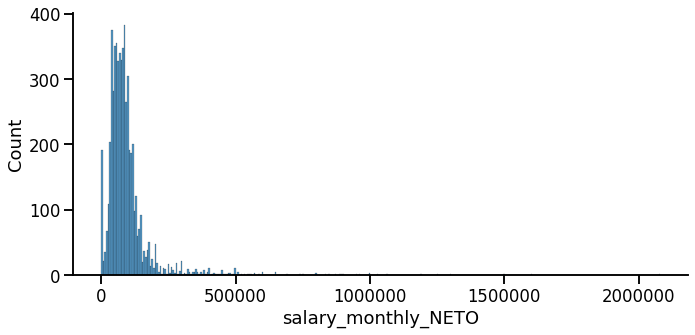

In [7]:
seaborn.displot(df.salary_monthly_NETO, aspect=2)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

### Conclusiones

* El rango de valores tomados por la columna va desde 0 hasta aproximadamente 2M.
* La mayoría de los valores se condensa por debajo de los 250K, y pocos superan los 500K.
* Los valores más frencuentes aparentan estar cerca de los 100K.
* Hay un pico de ocurrencias en el valor 0.

### VA numérica

In [28]:
df.profile_age.describe()

count     6095.000000
mean        41.181952
std        665.721175
min         18.000000
25%         27.000000
50%         31.000000
75%         37.000000
max      52000.000000
Name: profile_age, dtype: float64

In [8]:
# Obtenemos el rango de valores observados de la variable
df.profile_age.min(), df.profile_age.max()

(18, 52000)

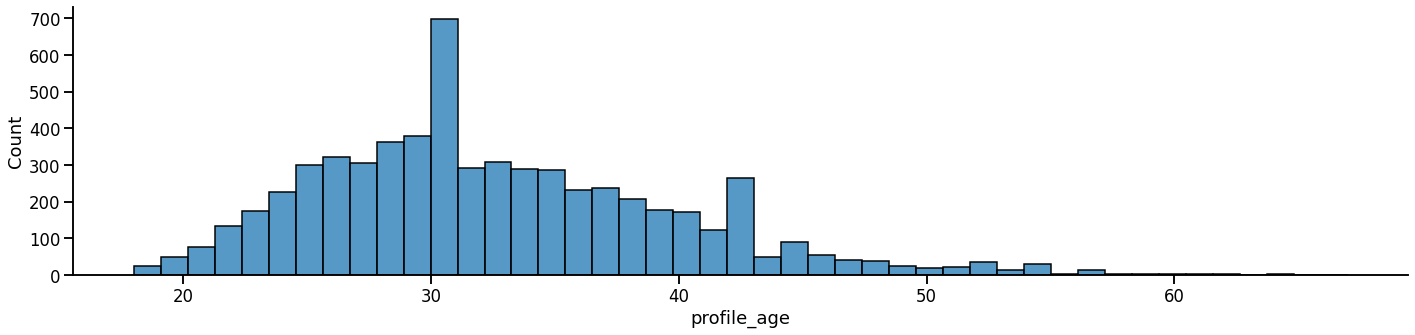

In [30]:
seaborn.displot(df.profile_age[df.profile_age < 100].dropna(), stat='count', aspect=4)

los histogramas pueden ocultar información porque agrupan rangos de valores en intervalos inferidos automáticamente

<ipython-input-10-039ea6518dc7>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


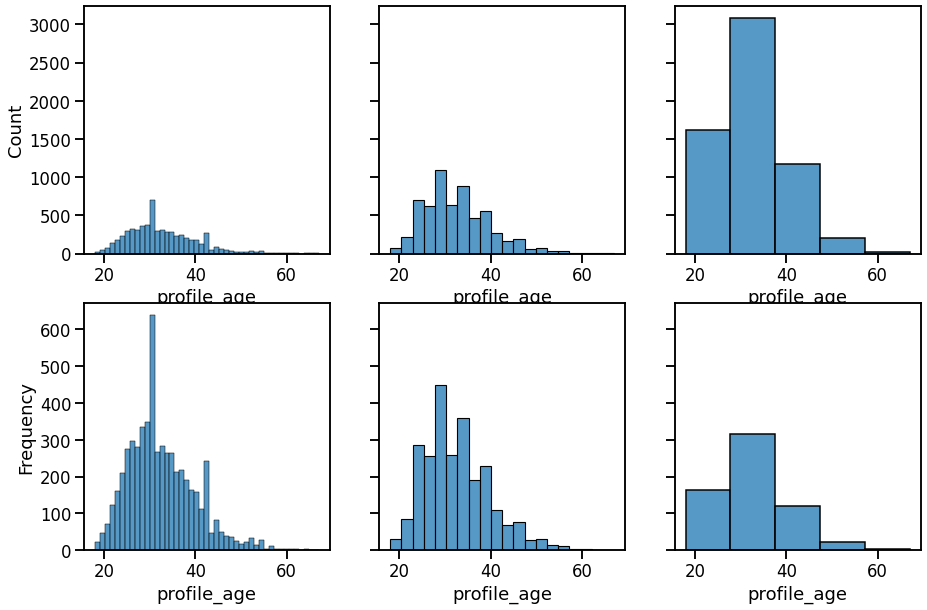

In [10]:
# Un ejemplo más avanzado
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharey='row')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,0],
                 stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,1],
                 bins=20, stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,2],
                 bins=5, stat='count')

seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,0],
                 stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,1],
                 bins=20, stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,2],
                 bins=5, stat='frequency')

fig.show()

Para variables discretas puede usarse un gráfico de línea, que permite visualizar el conteo de cada uno de los puntos en el rango observado.

/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


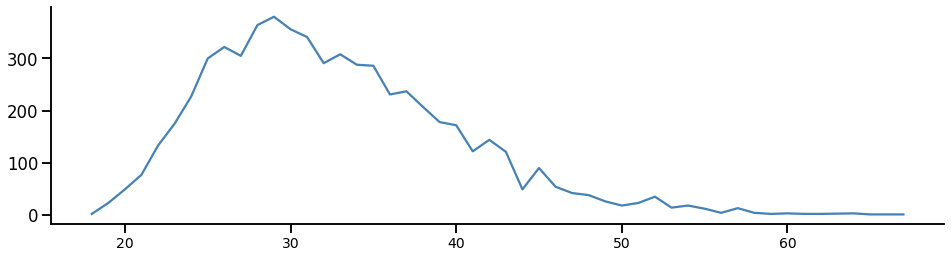

In [32]:
fig = plt.figure(figsize=(16,4))
age_counts = df[df.profile_age < 100].profile_age.value_counts()
seaborn.lineplot(age_counts.index, age_counts.values, color='steelblue')
plt.xticks(fontsize=14)  # Achicamos la letra para que se vea mejor
seaborn.despine()

In [41]:
df.salary_monthly_NETO.value_counts()

80000.0     149
100000.0    139
90000.0     116
110000.0    111
120000.0    104
           ... 
50451.0       1
297000.0      1
73413.5       1
73350.0       1
77800.0       1
Name: salary_monthly_NETO, Length: 1379, dtype: int64

In [40]:
df[df.profile_age < 100].profile_age.value_counts()

29    380
28    364
30    356
31    341
26    322
33    308
27    305
25    300
32    291
34    288
35    286
37    237
36    231
24    227
38    207
39    178
23    175
40    172
42    144
22    133
41    122
43    121
45     90
21     77
46     54
20     49
44     49
47     42
48     38
52     35
49     26
51     23
19     23
50     18
54     18
53     14
57     13
55     12
56      4
58      4
60      3
64      3
59      2
18      2
62      2
61      2
65      1
67      1
Name: profile_age, dtype: int64

In [46]:
df[df.salary_monthly_NETO < 500000].salary_monthly_NETO

0        43000.000
1        63000.000
2       127000.000
3       102000.000
4       106000.000
           ...    
6090     97000.000
6091     71000.000
6092        45.753
6093        72.000
6094     65000.000
Name: salary_monthly_NETO, Length: 5824, dtype: float64

/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


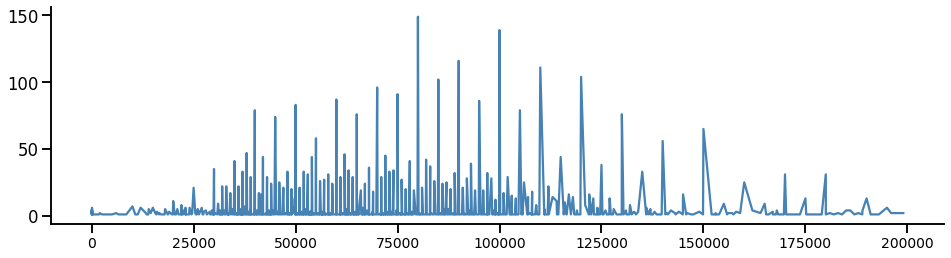

In [48]:
fig = plt.figure(figsize=(16,4))
salary_counts = df[df.salary_monthly_NETO < 200000].salary_monthly_NETO.value_counts()
seaborn.lineplot(salary_counts.index, salary_counts.values, color='steelblue')
plt.xticks(fontsize=14)  # Achicamos la letra para que se vea mejor
seaborn.despine()

---

### VA Categóricas

In [15]:
df.profile_gender.unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

In [57]:
df.work_province.unique()

array(['Ciudad Autónoma de Buenos Aires', 'Corrientes',
       'Provincia de Buenos Aires', 'Entre Ríos', 'Córdoba', 'Tucumán',
       'GBA', 'Santa Fe', 'Neuquén', 'Mendoza', 'Misiones', 'Chaco',
       'Chubut', 'Jujuy', 'La Rioja', 'Río Negro', 'Salta',
       'Tierra del Fuego', 'San Luis', 'Catamarca', 'San Juan',
       'Santiago del Estero', 'La Pampa', 'Formosa', 'Santa Cruz'],
      dtype=object)

In [59]:
df.profile_studies_level.unique()

array(['Universitario', 'Secundario', 'Posgrado', 'Terciario',
       'Doctorado', 'Posdoctorado', 'Primario'], dtype=object)

In [62]:
df.profile_studies_level_state.unique()

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

In [63]:
df.work_has_violence_situations.unique()

array(['En mi trabajo actual', 'Jamás', 'En un trabajo anterior', nan],
      dtype=object)

In [66]:
df.profile_sexual_orientation.unique()

array(['Homosexual', 'Heterosexual', 'Bisexual o queer',
       '¿Qué les importa?', nan,
       'No se programa con los genitales ni con la orientacion sexual.',
       'Queer no es una Orientación Sexual. Es una Identidad de Género. Soy QUEER y PANSEXUAL.',
       'Nose ni me importa', 'Demisexual', 'Oveja', 'Asexual',
       'Gordo lesbiano trans', 'edad', 'Puto el que lee',
       'Comentarios malintencionado',
       'Bi con atracción hacia las personas que leen encuestas',
       'Helicóptero apache andino de bigote tupido', 'Pansexual ',
       'Pansexual', 'No aplica', 'Una falange no es penal', 'others',
       'a quien le importa?', 'Normal',
       'Soy una mujer trans lesbiana = hombre heterosexual', 'asexual',
       'Me cabe vestirme de mujer', 'Intersexual', '--',
       'No es relevante', 'Asexual ', 'Juajua', 'bien macho carajo!',
       'Apache Helicopter', 'helicoptero apache', '¿?',
       'Cuando hay hambre, no hay pan duro.', 'grissexual',
       'Me exita comer p

In [67]:
df.company_main_activity.unique()

array(['Servicios / Consultoría de Software / Digital',
       'Otras industrias', 'Producto basado en Software'], dtype=object)

In [68]:
df.company_extra_benefits.unique()

array(['Capacitaciones y/o cursos, Comidas pagas / subvencionadas, Cuota para universidad / posgrados, Descuentos varios (Mercado Pago, Clarín 365, Club La Nación, etc), Horarios flexibles, Lactario en la oficina, Licencia de paternidad/maternidad extendida, Viáticos',
       'Horarios flexibles, Stock options / RSUs, Viáticos',
       'Clases de gimnasia online, Comidas pagas / subvencionadas, Descuentos varios (Mercado Pago, Clarín 365, Club La Nación, etc)',
       ...,
       'Abono de celular, Clases de gimnasia online, Clases de idiomas, Horarios flexibles, Vacaciones flexibles (adicionales a las reglamentarias), Viáticos',
       'Capacitaciones y/o cursos, Clases de gimnasia online, Clases de idiomas, Cuota para universidad / posgrados, Vacaciones flexibles (adicionales a las reglamentarias)',
       'Abono de celular, Capacitaciones y/o cursos, Descuentos varios (Mercado Pago, Clarín 365, Club La Nación, etc), Lactario en la oficina, Licencia de paternidad/maternidad extendida

In [55]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/exeq

<Figure size 576x432 with 0 Axes>

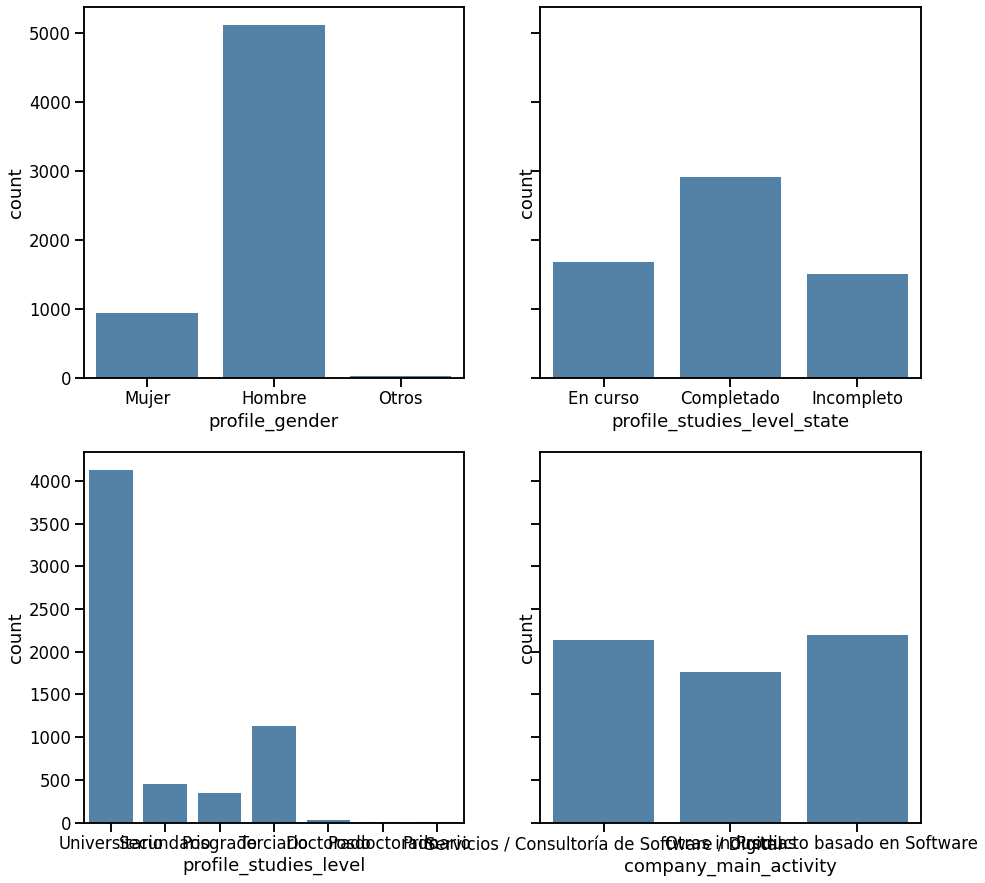

In [78]:
fig = plt.figure(figsize=(8,6))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15), sharey='row')
seaborn.countplot(df.profile_gender, color='steelblue',ax=ax[0,0])
seaborn.countplot(df.profile_studies_level_state, color='steelblue',ax=ax[0,1])
seaborn.countplot(df.profile_studies_level, color='steelblue',ax=ax[1,0])
seaborn.countplot(df.company_main_activity, color='steelblue',ax=ax[1,1])
fig.show()

Las variables categóricas pueden ser *ordinales*, si existe un orden lógico entre sus valores. Esto es independiente de que sean numéricas. En caso de que un orden exista, es adecuado incluirlo en el gráfico.

/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/exequiel/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


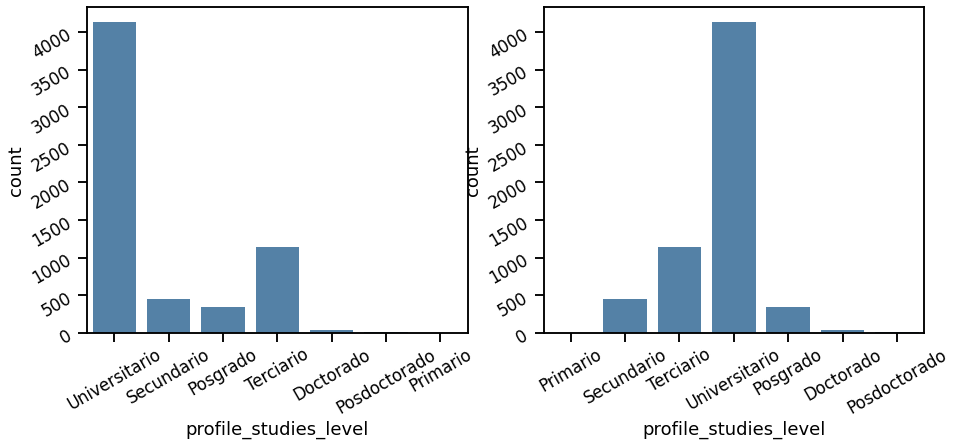

In [79]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[0])
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)

### Tipos de datos

In [80]:
age = df.profile_age.iloc[0]
type(age)

numpy.int64

In [82]:
print(type(3), type(3.44), type(1/3))  # 1/3 es un numero irracional
import numpy
print(numpy.iinfo('int64').min, numpy.iinfo('int64').max)
numpy.int64(numpy.iinfo('int64').max) + 1
numpy.int64(numpy.iinfo('int64').max + 1)

<class 'int'> <class 'float'> <class 'float'>
-9223372036854775808 9223372036854775807


<ipython-input-82-0a082d85077f>:4: RuntimeWarning: overflow encountered in long_scalars
  numpy.int64(numpy.iinfo('int64').max) + 1


OverflowError: Python int too large to convert to C long

In [84]:
df.dtypes

profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                                   object
tools_programming_languages                     

In [90]:
df.salary_in_usd.unique()

array([nan, 'Mi sueldo está dolarizado'], dtype=object)

In [92]:
df.loc[:,'salary_in_usd_bool'] = df.salary_in_usd.replace({'Mi sueldo está dolarizado': True}).fillna(False)
df.salary_in_usd_bool.unique()

array([False,  True])

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='salary_in_usd_bool', ylabel='Count'>

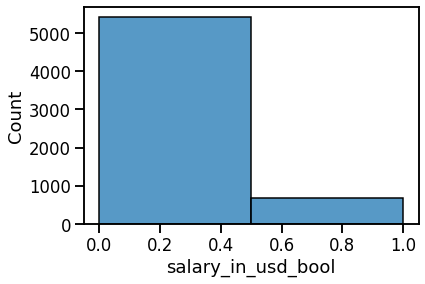

In [96]:
seaborn.histplot(df.salary_in_usd_bool, bins=2)

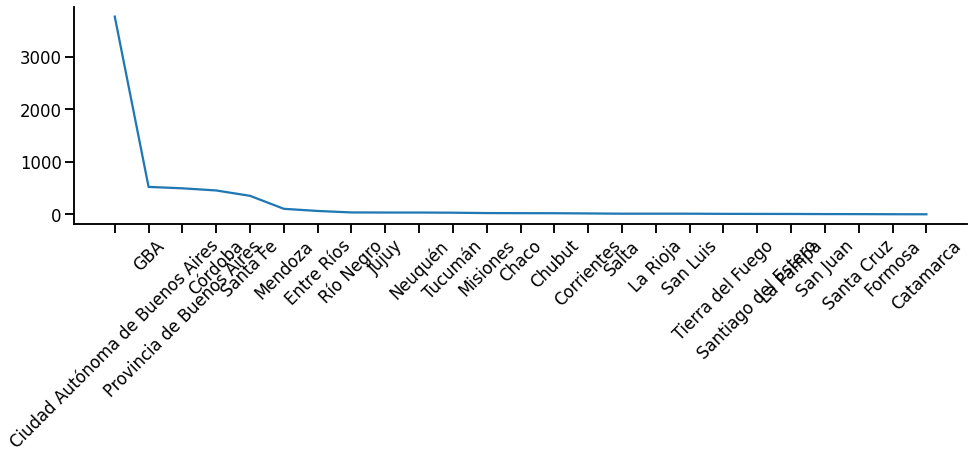

In [97]:
count_by_province = df.work_province.value_counts()
fig = plt.figure(figsize=(16, 4))
seaborn.lineplot(x=count_by_province.index, y=count_by_province.values)
plt.xticks(rotation=45)
seaborn.despine()

In [98]:
df.work_province.unique()

array(['Ciudad Autónoma de Buenos Aires', 'Corrientes',
       'Provincia de Buenos Aires', 'Entre Ríos', 'Córdoba', 'Tucumán',
       'GBA', 'Santa Fe', 'Neuquén', 'Mendoza', 'Misiones', 'Chaco',
       'Chubut', 'Jujuy', 'La Rioja', 'Río Negro', 'Salta',
       'Tierra del Fuego', 'San Luis', 'Catamarca', 'San Juan',
       'Santiago del Estero', 'La Pampa', 'Formosa', 'Santa Cruz'],
      dtype=object)

# Análisis del impacto de los años de experiencia

**¿Tener más años de experiencia significa que se cobra más?**

Para responder a esta pregunta, analizamos la probabilidad de que un programador tenga un salario mensual mayor que el promedio, cuando tiene una experiencia mayor que 5 años.

In [103]:
avg_salary = df.salary_monthly_NETO.mean()
avg_salary

94907.9491018188

In [122]:
len(df[df.salary_monthly_NETO >= avg_salary])

2019

Hay 2019 que cobran mas que el promedio

In [123]:
len(df)

6095

Hay en total 6095 registros

In [105]:
p_above_avg = len(df[df.salary_monthly_NETO >= avg_salary]) / len(df)
p_above_avg

0.33125512715340444

Hay una probabilidad de 33% de cobrar mas por tener mas de 5 años de experiencia

## Ejercicio

Reponder: **¿Si uno tiene más de 5 años de experiencia, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?**


In [125]:
is_above_avg = df.salary_monthly_NETO > avg_salary
experience_greater_5 = df.profile_years_experience > 5
intersection_count = len(df[is_above_avg & experience_greater_5])
intersection_count

1634

In [113]:
df[is_above_avg & experience_greater_5].head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,salary_in_usd_bool
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN,False
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN,False
25,Mujer,30,Argentina,Ciudad Autónoma de Buenos Aires,12.0,0.0,4.0,14,Universitario,Completado,...,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,8,4,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN,True
30,Hombre,53,Argentina,GBA,30.0,10.0,10.0,5,Universitario,En curso,...,Heterosexual,NaN,NaN,201-500,Otras industrias,6,1,"Abono de celular, Comidas pagas / subvencionad...",NaN,False
33,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,12.0,4.0,0.0,0,Universitario,Incompleto,...,Heterosexual,NaN,No,11-50,Producto basado en Software,5,3,"Clases de idiomas, Horarios flexibles",NaN,False


In [126]:
df[is_above_avg & experience_greater_5].describe()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
count,1634.00000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1.634000e+03,1.634000e+03,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,36.93880,13.948898,4.222460,3.587515,5.832925,1384.096695,2.221700e+05,1.707728e+05,2.985312,2.687882,12.383807,3.112607,7.876377,8.022032
std,14.52708,6.318015,5.121391,3.763645,63.291332,18990.237054,1.688778e+05,1.441367e+05,0.732271,0.889766,13.179065,2.927924,1.762894,2.102867
min,23.00000,5.500000,0.000000,0.000000,0.000000,0.000000,1.800000e+01,9.492000e+04,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,32.00000,10.000000,1.000000,1.000000,0.000000,0.000000,1.400000e+05,1.060000e+05,3.000000,2.000000,0.000000,0.000000,7.000000,7.000000
50%,36.00000,13.000000,2.000000,2.000000,0.000000,0.000000,1.750000e+05,1.250000e+05,3.000000,3.000000,10.000000,3.000000,8.000000,9.000000
75%,40.00000,17.000000,6.000000,5.000000,4.000000,0.000000,2.353750e+05,1.700000e+05,3.000000,3.000000,20.000000,6.750000,9.000000,10.000000
max,567.00000,115.000000,43.000000,30.000000,2500.000000,650000.000000,2.180000e+06,2.080000e+06,4.000000,4.000000,90.000000,8.000000,10.000000,10.000000
